In [1]:
import numpy as np
import scipy.constants as const
import scipy.interpolate as interpolate
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

In [17]:
pi = const.pi
e = const.e
e0= const.epsilon_0

In [18]:
eV_per_J = const.physical_constants["joule-electron volt relationship"][0]
cm_per_m = 100.0

In [2]:
def Gv(v, we, wexe, weye, weze=0, weae=0):
    return we*(v+1/2) - wexe*(v+1/2)**2 + weye*(v+1/2)**3 + weze*(v+1/2)**4 + weae*(v+1/2)**5

def Te(v, T0, we, wexe, weye, weze=0, weae=0):
    return T0 - we/2 + wexe/4 - weye/8 - weze/16 - weae/32

def Tv(v, T0, we, wexe, weye, weze=0, weae=0):
    return Te(v, T0, we, wexe, weye, weze, weae) + Gv(v, we, wexe, weye, weze, weae)

def Bv(v, Be, ae, ge=0, de=0, ee=0):
    return Be - ae*(v+1/2) - ge*(v+1/2)**2 + de*(v+1/2)**3 + ee*(v+1/2)**4

def fIntegrand(vp, v, vibConstants):
    (T0, we, wexe, weye, weze, weae) = vibConstants
    return 1/math.sqrt(Gv(v,we,wexe,weye,weze)-Gv(vp,we,wexe,weye,weze))

def gIntegrand(vp, v, vibConstants, rotConstants):
    (T0, we, wexe, weye, weze, weae) = vibConstants
    (Be, ae, ge, de, ee) = rotConstants
    return Bv(v,Be,ae,ge)/math.sqrt(Gv(v,we,wexe,weye,weze)-Gv(vp,we,wexe,weye,weze))

In [3]:
statesN2 = ["N2(X1Sigmag+)","N2(A3Sigmau+)","N2(B3Pig)","N2(W3Deltau)","N2(Bp3Sigmau-)",
            "N2(ap1Sigmau-)","N2(a1Pig)","N2(w1Deltau)","N2(C3Piu)","N2(E3Sigmag+)","N2(D3Sigmau+)"]
statesN2p = ["N2+(X2Sigmag+)","N2+(A2Piu)","N2+(B2Sigmau+)","N2+(C2Sigmau+)"]

vibConstantsN2 = [[0.0, 2358.57, 14.324, -2.26E-3, -2.4E-4, 0],
                 [49754.8, 1460.48, 13.775, -1.175E-2, 1.41E-4, -7.29E-5],
                 [59306.8, 1734.38, 14.558, 1.40E-2, -1.13E-3, 0],
                 [59380.2, 1506.53, 12.575, 3.09E-2, -7.1E-4, 0],
                 [65851.3, 1516.88, 12.181, 4.19E-2, -7.3E-4, 0],
                 [67739.3, 1530.25, 12.075, 4.13E-2, -2.9E-4, 0],
                 [68951.2, 1694.21, 13.949, 7.94E-3, 2.9E-4, 0],
                 [71698.4, 1559.50, 12.008, 4.54E-2, 0, 0],
                 [88977.9, 2047.18, 28.445, 2.0883, -5.350E-1, 0],
                 [95774.5, 2218, 16.3, -2.7E-2, -2.6E-3, 0],
                 [103570.9, 2207, 16.3, -2.7E-2, -2.6E-3, 0]]

vibConstantsN2p = [[125667.5, 2207.37, 16.302, -2.67E-3, -2.61E-3, 3.7E-5],
                  [134683.1, 1903.51, 15.029, 2.03E-3, 0, 0],
                  [151233.5, 2420.83, 23.851, -0.3587, -6.192E-2, 0],
                  [190209.5, 2071.5, 9.29, -0.43, 0, 0]]

rotConstantsN2 = [[1.99824, 1.7318E-2, -3.3E-5, 0, 0],
                 [1.45499, 1.8385E-2, 1.24E-5, -6.7E-6, 0],
                 [1.63802, 1.8302E-2, -8.4E-6, -3.4E-6, 0],
                 [1.47021, 1.6997E-2, -1.01E-5, 3.3E-7, 0],
                 [1.4731, 1.668E-2, 1.84E-5, -4.5E-7, 0],
                 [1.4799, 1.657E-2, 2.41E-5, 0, 0],
                 [1.6169, 1.793E-2, -2.93E-5, 0, 0],
                 [1.4963, 1.63E-2, 0, 0, 0],
                 [1.8247, 1.868E-2, -2.28E-3, 7.33E-4, -1.5E-4],
                 [1.9368, 1.90E-2, -1.9E-4, 0, 0],
                 [1.9705, 1.90E-2, -1.9E-4, 0, 0]]

rotConstantsN2p = [[1.93177, 1.900E-2, -1.91E-5, -5.00E-6, 4.6E-8],
                  [1.7442, 1.838E-2, -1.76E-4, 4.4E-6, 0],
                  [2.0845, 2.132E-2, -8.5E-4, 0, 0],
                  [1.5114, 1.10E-3, -8.2E-4, 0, 0]]

In [4]:
mu=1.16294E-26
wavenumber_per_eV = 8065.6

In [5]:
def f(v, vibConstants):
    I = quad(fIntegrand,-1/2,v,args=(v, vibConstants))
    return 1/(2*const.pi*math.sqrt(2*mu*const.speed_of_light/const.Planck)) * I[0] * 1E8

def g(v, vibConstants, rotConstants):
    I = quad(gIntegrand,-1/2,v,args=(v, vibConstants, rotConstants))
    return 2*const.pi*math.sqrt(2*mu*const.speed_of_light/const.Planck) * I[0] * 1E-8

In [6]:
def r(v, vibConstants, rotConstants):
    fv=f(v, vibConstants)
    gv=g(v, vibConstants, rotConstants)
    return [math.sqrt(fv**2 + fv/gv)-fv, math.sqrt(fv**2 + fv/gv)+fv]

In [59]:
def Jv(vMaxN2, vMaxN2p, stateN2, stateN2p):

    N2pPES = []
    (T0, we, wexe, weye, weze, weae) = vibConstantsN2p[stateN2p]

    for vp in range(vMaxN2p+1):
        rvp=r(vp, vibConstantsN2p[stateN2p], rotConstantsN2p[stateN2p])
        Tvp=Tv(vp, T0, we, wexe, weye, weze, weae)/wavenumber_per_eV
        N2pPES.insert(0, [rvp[0], Tvp])
        N2pPES.append([rvp[1], Tvp])
    
    N2pPES = np.asarray(N2pPES)
    
    I_N2pPES = interpolate.interp1d(N2pPES[:,0], N2pPES[:,1], kind='quadratic')

    N2PES = []
    JvArray = np.empty([vMaxN2+1,2])
        
    (T0, we, wexe, weye, weze, weae) = vibConstantsN2[stateN2]
    for v in range(len(JvArray)):
        rv=r(v, vibConstantsN2[stateN2], rotConstantsN2[stateN2])
        Tvv=Tv(v, T0, we, wexe, weye, weze, weae)/wavenumber_per_eV
        N2PES.insert(0, [rv[0], Tvv])
        N2PES.append([rv[1], Tvv])
        JvArray[v] = I_N2pPES(rv)-Tvv

    N2PES = np.asarray(N2PES)
        
    return (N2PES, N2pPES, JvArray)

In [60]:
(N2PES, N2pPES, Jvv) = Jv(40,35,0,0)

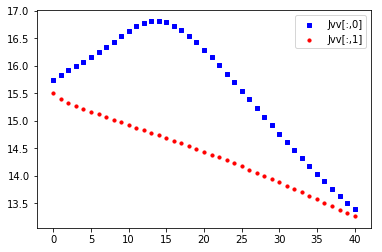

In [61]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x = list(range(len(Jvv)))
y = Jvv[:,0]
ax1.scatter(x, y, s=10, c='b', marker="s", label='Jvv[:,0]')
y = Jvv[:,1]
ax1.scatter(x,y, s=10, c='r', marker="o", label='Jvv[:,1]')
plt.legend(loc='upper right');
plt.show()

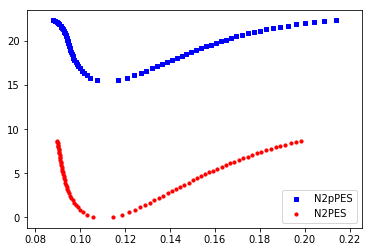

In [62]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

x,y = N2pPES.T
ax1.scatter(x, y, s=10, c='b', marker="s", label='N2pPES')
x,y = N2PES.T
ax1.scatter(x,y, s=10, c='r', marker="o", label='N2PES')
plt.legend(loc='lower right');
plt.show()

In [63]:
def f_eqn15(x: float):
    "Equation 15 of Kosarim, et al., for all electrons."
    "return (6*(x-1))/(pi*(x+1.5)*(x+9))"
    return (6*(x-1))/(pi*(x+10)*(x+2))

In [64]:
def sigma_ion(f, n: int, E: float, J_v_vp: float, J_v_vpp: float):
    """Compute cross-sections (10^-17 cm^2) of ionization transitions for 
    Tables 2-4 of Kosarim, et al."""
    return (cm_per_m**2 * eV_per_J**2)/(1.0E-17)  * (1./(4.*pi*e0)**2) * \
        ((n*e**4)/2.) * ( f(E/J_v_vp)/(J_v_vp**2) + f(E/J_v_vpp)/(J_v_vpp**2) )

In [96]:
E = np.logspace(1.3, 2.3, num=50)
sigma = np.empty([len(Jvv), len(E)])
for v in range(len(Jvv)):
    sigma[v] = sigma_ion(f_eqn15, 2, E, Jvv[v,0], Jvv[v,1])

In [97]:
E

array([ 19.95262315,  20.91260638,  21.91877742,  22.9733585 ,
        24.07867878,  25.23717948,  26.45141928,  27.72407997,
        29.05797235,  30.45604247,  31.92137813,  33.45721567,
        35.06694718,  36.75412791,  38.5224842 ,  40.37592165,
        42.31853379,  44.35461108,  46.48865043,  48.72536511,
        51.06969514,  53.52681823,  56.10216121,  58.80141202,
        61.63053225,  64.59577031,  67.70367528,  70.96111129,
        74.37527276,  77.95370023,  81.70429707,  85.63534688,
        89.75553181,  94.07395175,  98.60014441, 103.34410639,
       108.31631524, 113.52775265, 118.98992864, 124.71490704,
       130.7153321 , 137.00445641, 143.5961702 , 150.505032  ,
       157.74630079, 165.33596972, 173.29080142, 181.62836499,
       190.36707488, 199.5262315 ])

In [98]:
sigma[:,0]

array([0.24420484, 0.24439477, 0.24424269, 0.24393526, 0.24343046,
       0.24273676, 0.2418584 , 0.24083975, 0.2397517 , 0.23872526,
       0.23795676, 0.23770826, 0.23826744, 0.2398706 , 0.24265264,
       0.24661728, 0.25168706, 0.25775014, 0.26469505, 0.27242727,
       0.28086734, 0.28995956, 0.29965661, 0.30992719, 0.32073789,
       0.33207729, 0.34391808, 0.35624298, 0.36904215, 0.38230116,
       0.39599294, 0.41009993, 0.42460475, 0.43948718, 0.45471946,
       0.47026168, 0.48608363, 0.50214853, 0.51841435, 0.53484346,
       0.55138219])

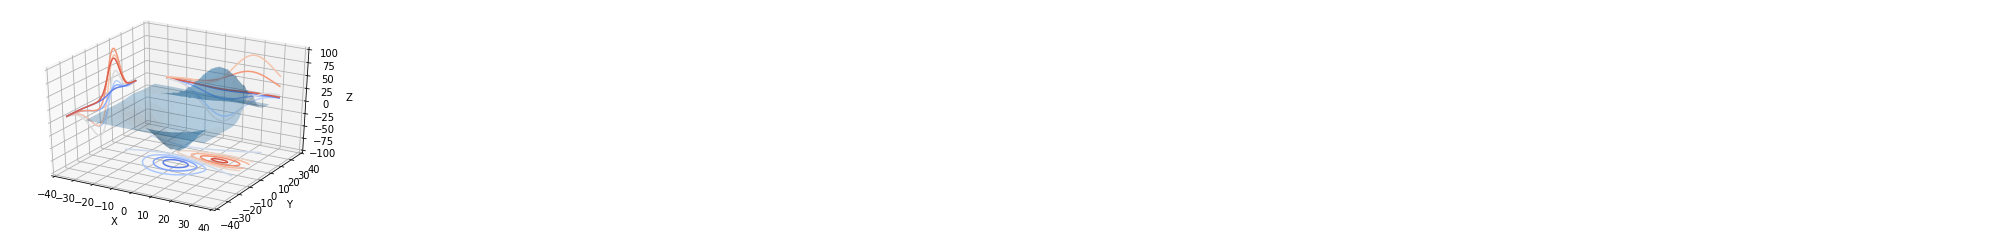

In [89]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import cm

fig = plt.figure()
ax = fig.gca(projection='3d')
X, Y, Z = axes3d.get_test_data(0.05)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, rstride=8, cstride=8, alpha=0.3)

# Plot projections of the contours for each dimension.  By choosing offsets
# that match the appropriate axes limits, the projected contours will sit on
# the 'walls' of the graph
cset = ax.contour(X, Y, Z, zdir='z', offset=-100, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-40, cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=40, cmap=cm.coolwarm)

ax.set_xlim(-40, 40)
ax.set_ylim(-40, 40)
ax.set_zlim(-100, 100)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()

In [94]:
X

array([[-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       ...,
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5],
       [-30. , -29.5, -29. , ...,  28.5,  29. ,  29.5]])

In [95]:
Y

array([[-30. , -30. , -30. , ..., -30. , -30. , -30. ],
       [-29.5, -29.5, -29.5, ..., -29.5, -29.5, -29.5],
       [-29. , -29. , -29. , ..., -29. , -29. , -29. ],
       ...,
       [ 28.5,  28.5,  28.5, ...,  28.5,  28.5,  28.5],
       [ 29. ,  29. ,  29. , ...,  29. ,  29. ,  29. ],
       [ 29.5,  29.5,  29.5, ...,  29.5,  29.5,  29.5]])

In [91]:
len(X[:,0])

120

In [93]:
len(X[0,:])

120

In [91]:
len(Y[:,0])

120

In [92]:
len(Z[:,0])

120